# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

If I wanted to show nitrate and phosphate levels in a water sample, there are trade-offs between using an area plot and using two separate line graphs:

#### Advantages of an Area Plot:
- It allows viewers to quickly compare the total combined level of both chemicals over time.
- Visually emphasizes how the levels contribute to the whole — useful if the total level matters more than the individual trends.
- It can be more engaging and visually appealing in a presentation context.

#### Disadvantages of an Area Plot:
- It can be hard to read the individual trends, especially for the second series stacked on top of the first.
- The shape of the upper layer can be misleading because it includes the lower series underneath — it’s not a true reflection of its own trend.
- It may confuse viewers if the goal is to compare nitrate versus phosphate levels individually rather than their combined contribution.

### How I Would Improve the Graph:
- If using an area plot, I would apply transparency to each area, add labels directly onto the plot, and consider overlaying lines on top of the areas to better clarify the trend of each chemical.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

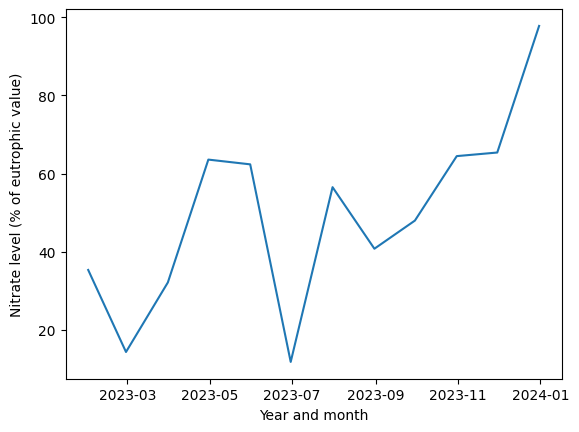

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

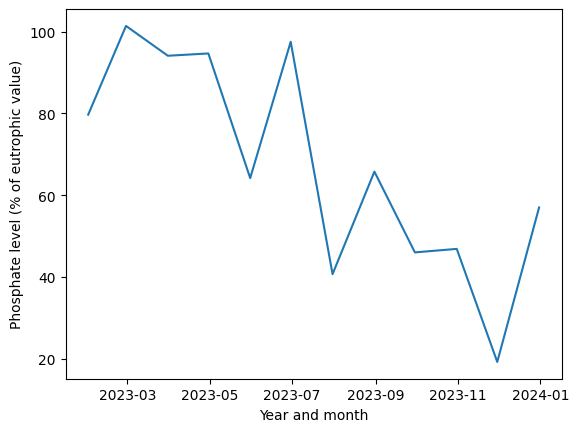

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

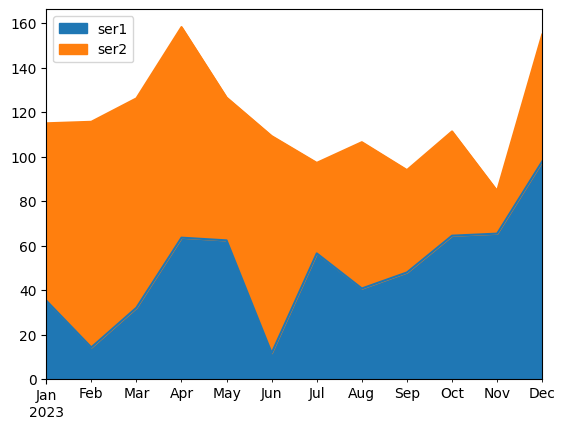

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

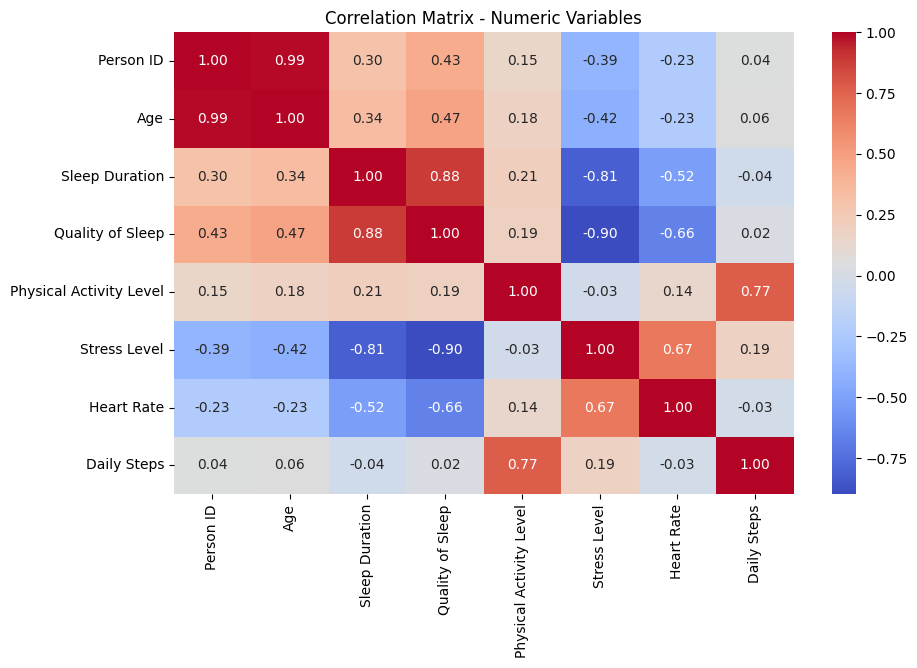

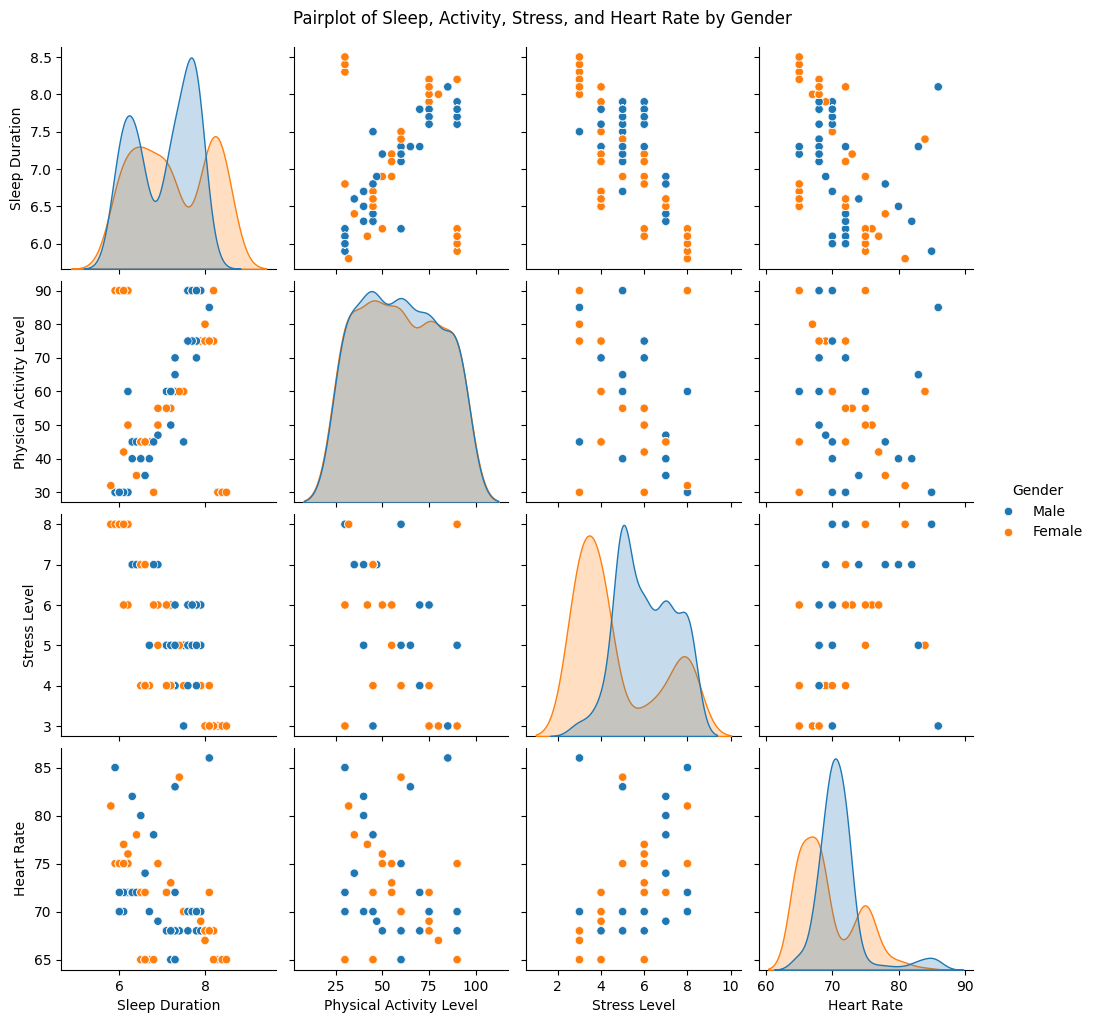

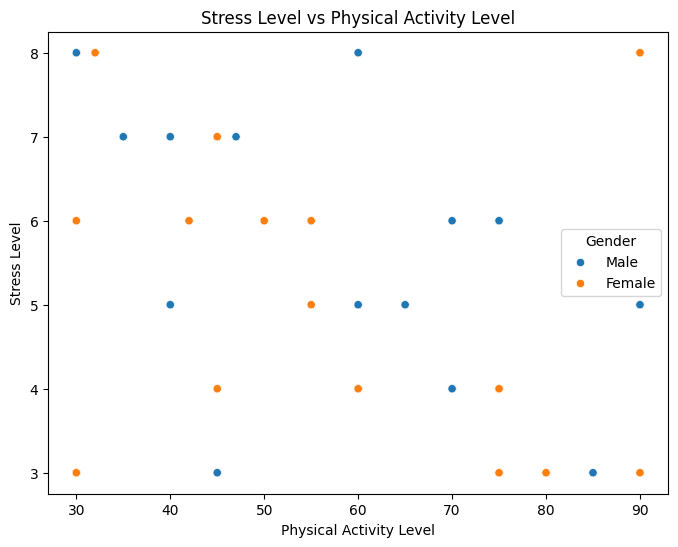

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 1. Correlation matrix for numeric features
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Numeric Variables")
plt.show()

# 2. Pairplot for key numeric variables
sns.pairplot(df, vars=["Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate"],
             hue="Gender")
plt.suptitle("Pairplot of Sleep, Activity, Stress, and Heart Rate by Gender", y=1.02)
plt.show()

# 3. Scatterplot for strong correlation (if any)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=df, hue='Gender')
plt.title("Stress Level vs Physical Activity Level")
plt.show()


This analysis uses the "Sleep Health and Lifestyle" dataset to explore multivariate patterns and potential data quality issues.

 Correlations
From the correlation matrix, most numeric variables show weak to moderate correlations. One notable pattern is a **negative correlation between Physical Activity Level and Stress Level**, which suggests that more active individuals tend to be less stressed — an intuitive and expected result.

 Scatterplot Insights
The scatterplot confirms this inverse relationship between stress and activity. There is a downward trend, particularly among females, although variability remains.

 Pairplot Observations
The pairplot reveals that:
- **Higher heart rate** and **higher stress level** may be related, though the correlation is not very strong.
- **Sleep duration** shows wide variation across genders but no dramatic separation.
- Some clustering can be seen by gender, but not strongly enough to draw hard conclusions.

 Outliers
A few individuals exhibit **unusually high heart rates or stress levels**. These may be outliers or data entry errors and should be flagged for further investigation before modeling.
Data Usability
Overall, the data appears usable and behaves as expected for real-world survey data. It’s relatively clean, though small amounts of noise and inconsistency are present.

 Redundancy
No features are extremely correlated (e.g., above 0.85), so we don’t see obvious redundancy. However, **Stress Level and Heart Rate** may capture overlapping physiological effects.

Confounding Variables
There may be **unreported third variables** influencing the relationships:
- For example, **diet**, **medication**, or **mental health status** might affect both stress and sleep but are not included.
- **Occupation** might confound the relationship between physical activity and stress.

These insights help identify what preprocessing or enrichment may be needed before building predictive models in Milestone 3.
Let me know when you’re ready for Part 4 or if you want to commit this notebook to GitHub now.










# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

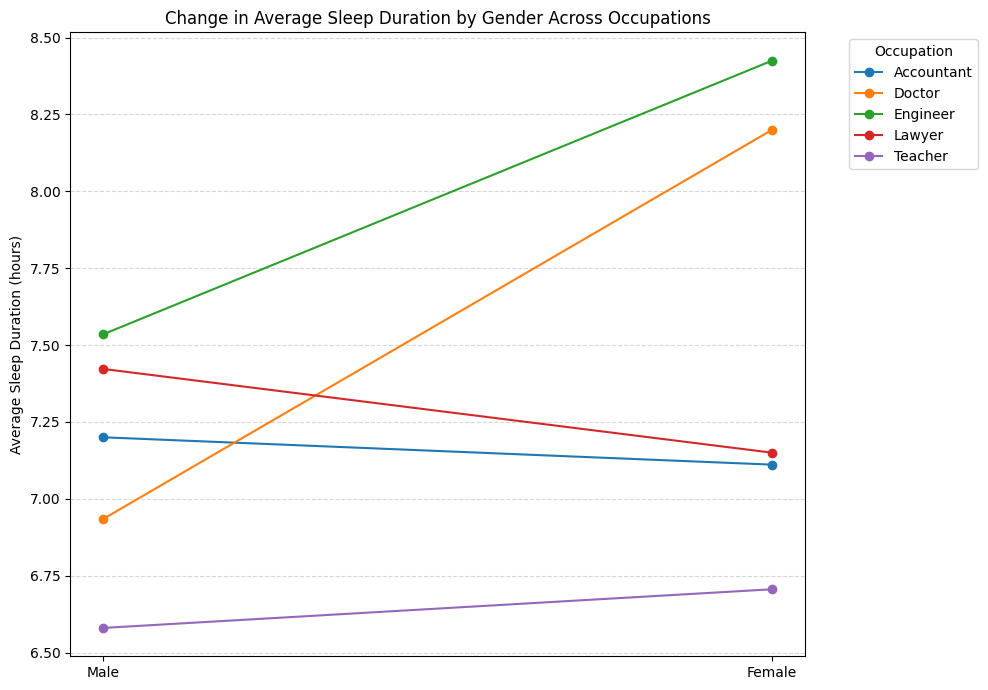

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Group by Occupation and Gender and get average Sleep Duration
avg_sleep = df.groupby(['Occupation', 'Gender'])['Sleep Duration'].mean().unstack()

# Drop occupations with missing values in either gender
avg_sleep = avg_sleep.dropna()

# Create the slope chart
plt.figure(figsize=(10, 7))

for i in avg_sleep.index:
    plt.plot(['Male', 'Female'], [avg_sleep.loc[i, 'Male'], avg_sleep.loc[i, 'Female']],
             marker='o', label=i)

plt.title('Change in Average Sleep Duration by Gender Across Occupations')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(['Male', 'Female'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Occupation')
plt.tight_layout()
plt.show()